In [12]:
import glob
import os
import re
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

## get data from mpi2d csv

In [13]:
mpi2d = pd.read_csv('result_mpi1d.csv')
mpi2d

,x,y,freq,steps,seed,node,rank per node,dimension,time,name,total_rank
0,1000,1000,1,128,10,1,1,1,44.08600,1000(2000)_1000_n1_different_rank.out,1
1,1000,1000,1,128,10,1,2,1,22.00590,1000(2000)_1000_n1_different_rank.out,2
2,1000,1000,1,128,10,1,4,1,11.44720,1000(2000)_1000_n1_different_rank.out,4
3,1000,1000,1,128,10,1,8,1,5.85968,1000(2000)_1000_n1_different_rank.out,8
4,1000,1000,1,128,10,1,9,1,5.13363,1000(2000)_1000_n1_different_rank.out,9
...,...,...,...,...,...,...,...,...,...,...,...
306,72000,1000,1,128,10,2,36,1,46.62060,weak_scaling.out,72
307,80000,1000,1,128,10,2,40,1,46.66980,weak_scaling.out,80
308,100000,1000,1,128,10,2,50,1,46.71950,weak_scaling.out,100
309,120000,1000,1,128,10,2,60,1,47.04240,weak_scaling.out,120


# Fixed board size, time change with rank, different update frequency(几条线）

In [14]:
#get data
new_data = mpi2d.copy()
new_data = new_data[new_data['name'].str.contains('frequency')]

### Node == 1

In [15]:
n1_data = new_data[new_data['node'] == 1]
n1_1000 = n1_data[n1_data['x'] == 1000]
n1_2000 = n1_data[n1_data['x'] == 2000]

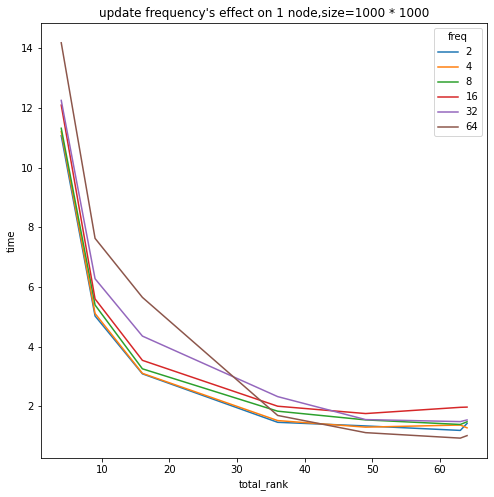

In [16]:
plt.figure(figsize=(8,8))
palette = sns.color_palette("tab10", 6)
sns.lineplot(data=n1_1000, x='total_rank',y='time',hue='freq',palette=palette)
plt.title("update frequency's effect on 1 node,size=1000 * 1000")
plt.savefig('fig/mpi1d_frequency_1000_n1')

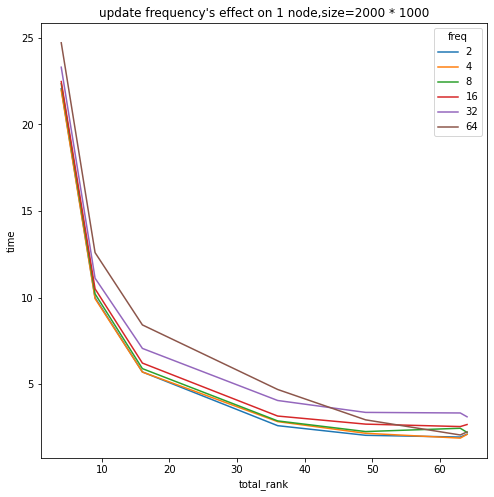

In [17]:
plt.figure(figsize=(8,8))
palette = sns.color_palette("tab10", 6)
sns.lineplot(data=n1_2000, x='total_rank',y='time',hue='freq',palette=palette)
plt.title("update frequency's effect on 1 node,size=2000 * 1000")
plt.savefig('fig/mpi1d_frequency_2000_n1')

### Node == 2

In [18]:
n2_data = new_data[new_data['node'] == 2]
n2_1000 = n2_data[n2_data['x'] == 1000]
n2_2000 = n2_data[n2_data['x'] == 2000]

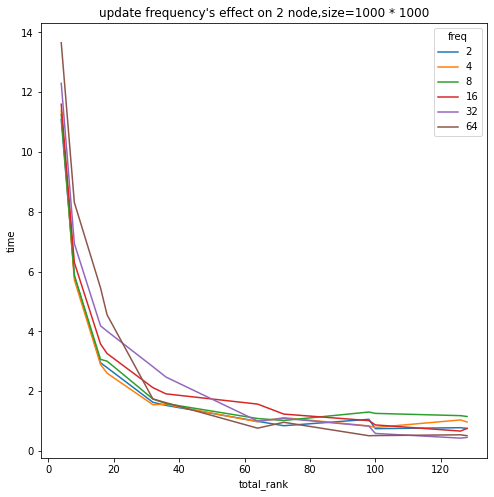

In [19]:
plt.figure(figsize=(8,8))
palette = sns.color_palette("tab10", 6)
sns.lineplot(data=n2_1000, x='total_rank',y='time',hue='freq',palette=palette)
plt.title("update frequency's effect on 2 node,size=1000 * 1000")
plt.savefig('fig/mpi1d_frequency_1000_n2')

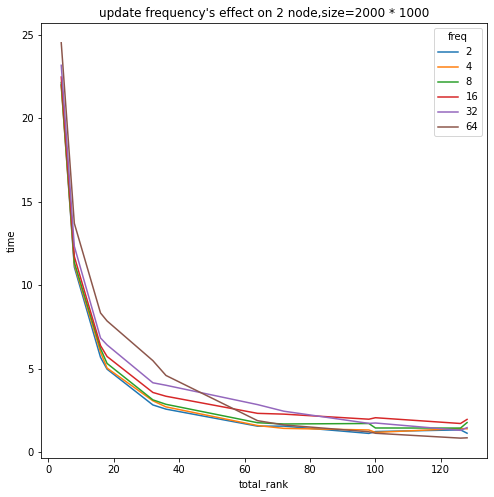

In [20]:
plt.figure(figsize=(8,8))
palette = sns.color_palette("tab10", 6)
sns.lineplot(data=n2_2000, x='total_rank',y='time',hue='freq',palette=palette)
plt.title("update frequency's effect on 2 node,size=2000 * 1000")
plt.savefig('fig/mpi1d_frequency_2000_n2')

# Weak Scaling

In [21]:
new_data = mpi2d.copy()
new_data = new_data[new_data['name'].str.contains('weak')]

In [22]:
new_data['weak'] = 44.0368 / new_data['time']
new_data

,x,y,freq,steps,seed,node,rank per node,dimension,time,name,total_rank,weak
284,1000,1000,1,128,10,1,1,1,44.0368,weak_scaling.out,1,1.000000
285,2000,1000,1,128,10,1,2,1,44.0335,weak_scaling.out,2,1.000075
286,4000,1000,1,128,10,1,4,1,44.1841,weak_scaling.out,4,0.996666
287,8000,1000,1,128,10,1,8,1,46.1947,weak_scaling.out,8,0.953287
288,9000,1000,1,128,10,1,9,1,44.0815,weak_scaling.out,9,0.998986
289,16000,1000,1,128,10,1,16,1,44.1649,weak_scaling.out,16,0.997100
290,25000,1000,1,128,10,1,25,1,44.6937,weak_scaling.out,25,0.985302
291,32000,1000,1,128,10,1,32,1,44.8589,weak_scaling.out,32,0.981674
292,36000,1000,1,128,10,1,36,1,46.1993,weak_scaling.out,36,0.953192
293,40000,1000,1,128,10,1,40,1,45.0516,weak_scaling.out,40,0.977475


In [23]:
weak_n1 = new_data[new_data['node'] == 1]
weak_n2 = new_data[new_data['node'] == 2]

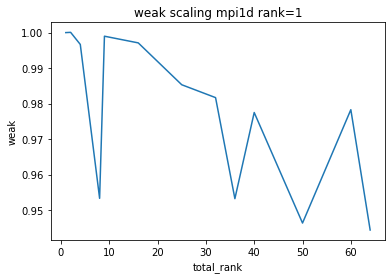

In [24]:
sns.lineplot(data=weak_n1,x='total_rank',y='weak')
plt.title("weak scaling mpi1d rank=1")
plt.savefig('fig/mpi1d_weak_n1')

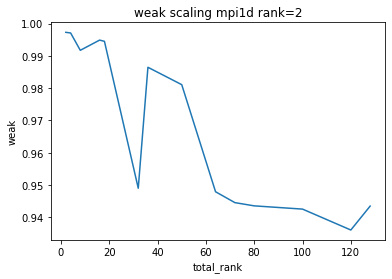

In [25]:
sns.lineplot(data=weak_n2,x='total_rank',y='weak')
plt.title("weak scaling mpi1d rank=2")
plt.savefig('fig/mpi1d_weak_n2')

# Fixed board size, update frequency, time change with rank (same node) 几条线，2个size

In [26]:
df_n1 = mpi2d[mpi2d['name'] == '1000(2000)_1000_n1_different_rank.out']
df_n2 = mpi2d[mpi2d['name'] == '1000(2000)_1000_n2_different_rank.out']

### Node == 1

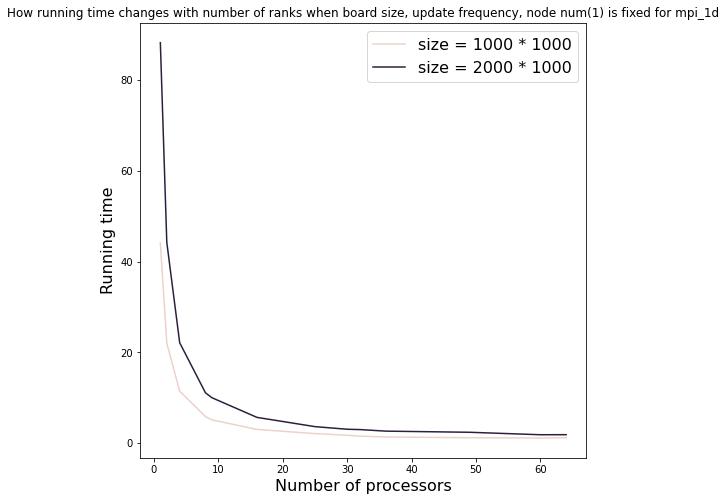

In [27]:
plt.figure(figsize=(8,8))
sns.lineplot(data=df_n1, x='total_rank',y='time',hue='x')
plt.legend(labels=['size = 1000 * 1000', 'size = 2000 * 1000'], fontsize=16)
plt.title("How running time changes with number of ranks when board size, update frequency, node num(1) is fixed for mpi_1d")
plt.ylabel("Running time", fontsize=16)
plt.xlabel("Number of processors", fontsize=16)
plt.savefig('fig/mpi1d_rank_n1')

### Node == 2

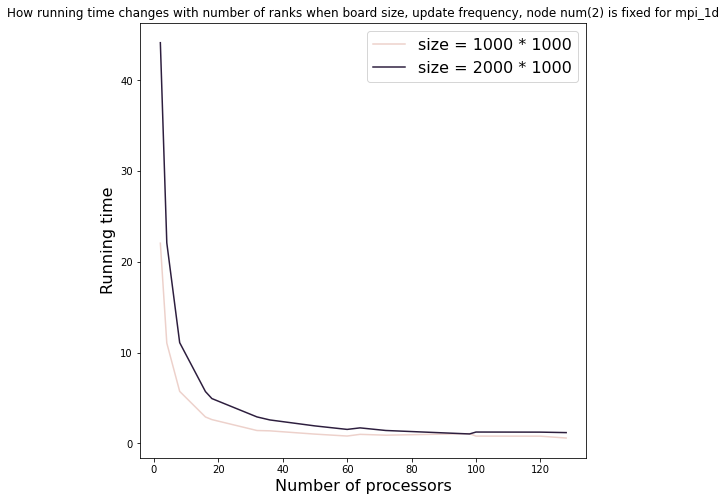

In [28]:
plt.figure(figsize=(8,8))
sns.lineplot(data=df_n2, x='total_rank',y='time',hue='x')
plt.legend(labels=['size = 1000 * 1000', 'size = 2000 * 1000'], fontsize=16)
plt.title("How running time changes with number of ranks when board size, update frequency, node num(2) is fixed for mpi_1d")
plt.ylabel("Running time", fontsize=16)
plt.xlabel("Number of processors", fontsize=16)
plt.savefig('fig/mpi1d_rank_n2')

# Strong scaling(multiple size)

In [29]:
df_n1_s1 = df_n1[df_n1['x'] == 1000]
df_n1_s2 = df_n1[df_n1['x'] == 2000]
df_n2_s1 = df_n2[df_n2['x'] == 1000]
df_n2_s2 = df_n2[df_n2['x'] == 2000]
df_n1_s1['speed_up_strong'] = 44.086/df_n1_s1['time']
df_n1_s2['speed_up_strong'] = 88.1854/df_n1_s2['time']
df_n2_s1['speed_up_strong'] = 44.086/df_n2_s1['time']
df_n2_s2['speed_up_strong'] = 88.1854/df_n2_s2['time']
df_n1_s1['efficiency_strong'] = df_n1_s1['speed_up_strong']/df_n1_s1['total_rank']
df_n1_s2['efficiency_strong'] = df_n1_s2['speed_up_strong']/df_n1_s2['total_rank']
df_n2_s1['efficiency_strong'] = df_n2_s1['speed_up_strong']/df_n2_s1['total_rank']
df_n2_s2['efficiency_strong'] = df_n2_s2['speed_up_strong']/df_n2_s2['total_rank']

/var/folders/f5/8xj21yh179v3dxw13qwf70780000gn/T/ipykernel_34067/417927633.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n1_s1['speed_up_strong'] = 44.086/df_n1_s1['time']
/var/folders/f5/8xj21yh179v3dxw13qwf70780000gn/T/ipykernel_34067/417927633.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_n1_s2['speed_up_strong'] = 88.1854/df_n1_s2['time']
/var/folders/f5/8xj21yh179v3dxw13qwf70780000gn/T/ipykernel_34067/417927633.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

### Node == 1

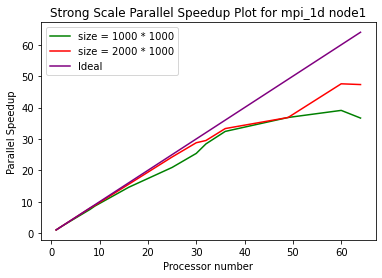

In [30]:
plt.title("Strong Scale Parallel Speedup Plot for mpi_1d node1")
plt.xlabel("Processor number")
plt.ylabel("Parallel Speedup")
plt.plot(df_n1_s1['total_rank'], df_n1_s1['speed_up_strong'], color ="green", label = "size = 1000 * 1000")
plt.plot(df_n1_s2['total_rank'], df_n1_s2['speed_up_strong'], color ="red", label = "size = 2000 * 1000")
plt.plot(df_n1_s1['total_rank'], df_n1_s1['total_rank'], color ="purple", label = "Ideal")
plt.legend(loc="upper left")
plt.savefig('fig/mpi1d_strong_speed_n1')

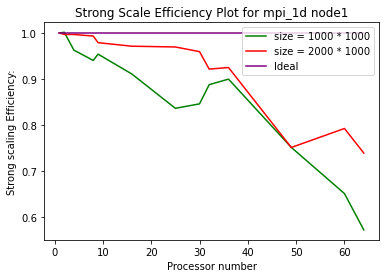

In [31]:
plt.title("Strong Scale Efficiency Plot for mpi_1d node1")
plt.xlabel("Processor number")
plt.ylabel("Strong scaling Efficiency:")
plt.plot(df_n1_s1['total_rank'], df_n1_s1['efficiency_strong'], color ="green", label = "size = 1000 * 1000")
plt.plot(df_n1_s2['total_rank'], df_n1_s2['efficiency_strong'], color ="red", label = "size = 2000 * 1000")
plt.plot(df_n1_s1['total_rank'], df_n1_s1['total_rank']/df_n1_s1['total_rank'], color ="purple", label = "Ideal")
plt.legend(loc="upper right")
plt.savefig('fig/mpi1d_strong_efficiency_n1')

### Node == 2

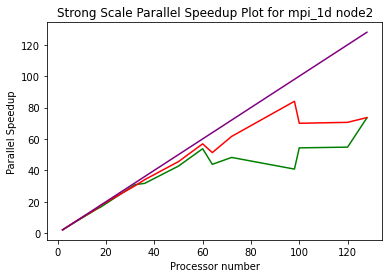

In [32]:
plt.title("Strong Scale Parallel Speedup Plot for mpi_1d node2")
plt.xlabel("Processor number")
plt.ylabel("Parallel Speedup")
plt.plot(df_n2_s1['total_rank'], df_n2_s1['speed_up_strong'], color ="green", label = "size = 1000 * 1000")
plt.plot(df_n2_s2['total_rank'], df_n2_s2['speed_up_strong'], color ="red", label = "size = 2000 * 1000")
plt.plot(df_n2_s1['total_rank'], df_n2_s1['total_rank'], color ="purple", label = "Ideal")
plt.savefig('fig/mpi1d_strong_speed_n2')

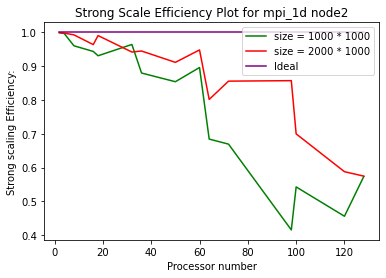

In [33]:
plt.title("Strong Scale Efficiency Plot for mpi_1d node2")
plt.xlabel("Processor number")
plt.ylabel("Strong scaling Efficiency:")
plt.plot(df_n2_s1['total_rank'], df_n2_s1['efficiency_strong'], color ="green", label = "size = 1000 * 1000")
plt.plot(df_n2_s2['total_rank'], df_n2_s2['efficiency_strong'], color ="red", label = "size = 2000 * 1000")
plt.plot(df_n2_s1['total_rank'], df_n2_s1['total_rank']/df_n2_s1['total_rank'], color ="purple", label = "Ideal")
plt.legend(loc="upper right")
plt.savefig('fig/mpi1d_strong_efficiency_n2')